# STOR 120 - Homework 5: Probability, Simulation, Estimation, and Assessing Models

**Reading**: 
* [Randomness](https://www.inferentialthinking.com/chapters/09/Randomness.html) 
* [Sampling and Empirical Distributions](https://www.inferentialthinking.com/chapters/10/Sampling_and_Empirical_Distributions.html)
* [Testing Hypotheses](https://www.inferentialthinking.com/chapters/11/Testing_Hypotheses.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell. 

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.

For all problems that you must write out explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on.

In [1]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## 1. Roulette

A Nevada roulette wheel has 38 pockets and a small ball that rests on the wheel. When the wheel is spun, the ball comes to rest in one of the 38 pockets. That pocket is declared the winner. 

The pockets are labeled 0, 00, 1, 2, 3, 4, ... , 36. Pockets 0 and 00 are green, and the other pockets are alternately red and black. The table `wheel` is a representation of a Nevada roulette wheel. **Note that *both* columns consist of strings.** Below is an example of a roulette wheel!

<img src="roulette_wheel.jpeg" width="330px">

Run the cell below to load the `wheel` table.

In [2]:
wheel = Table.read_table('roulette_wheel.csv', dtype=str)
wheel

Pocket,Color
00,green
0,green
1,red
2,black
3,red
4,black
5,red
6,black
7,red
8,black


### Betting on Red ###
If you bet on *red*, you are betting that the winning pocket will be red. This bet *pays 1 to 1*. That means if you place a one-dollar bet on red, then:

- If the winning pocket is red, you gain 1 dollar. That is, you get your original dollar back, plus one more dollar.
- If the winning pocket is not red, you lose your dollar. In other words, you gain -1 dollars.

Let's see if you can make money by betting on red at roulette.

**Question 1.1.** Define a function `dollar_bet_on_red` that takes the name of a color and returns your gain in dollars if that color had won and you had placed a one-dollar bet on red. Remember that the gain can be negative. Make sure your function returns an integer.

*Note:* You can assume that the only colors that will be passed as arguments are red, black, and green. Your function doesn't have to check that.

In [3]:
def dollar_bet_on_red(color):
    """Returns gains in dollars for a 1 dollar bet on red"""
    if color == 'red':
        return 1
    else:
        return -1

Run the cell below to make sure your function is working.

In [4]:
print(dollar_bet_on_red('green'))
print(dollar_bet_on_red('black'))
print(dollar_bet_on_red('red'))

-1
-1
1


**Question 1.2.** Add a column labeled `Winnings: Red` to the table `wheel`. For each pocket, the column should contain your gain in dollars if that pocket won and you had bet one dollar on red. Your code should use the function `dollar_bet_on_red`.

> *Hint:* You should not need a `for` loop for this question, instead try using a table method!

In [6]:
red_winnings = wheel.apply(dollar_bet_on_red, 'Color')
wheel = wheel.with_column('Winnings: Red', red_winnings)
wheel

Pocket,Color,Winnings: Red
00,green,-1
0,green,-1
1,red,1
2,black,-1
3,red,1
4,black,-1
5,red,1
6,black,-1
7,red,1
8,black,-1


### Simulating 10 Bets on Red
Roulette wheels are set up so that each time they are spun, the winning pocket is equally likely to be any of the 38 pockets regardless of the results of all other spins. Let's see what would happen if we decided to bet one dollar on red each round.

**Question 1.3.** Create a table `ten_bets` by sampling the table `wheel` to simulate 10 spins of the roulette wheel. Your table should have the same three column labels as in `wheel`. Once you've created that table, set `sum_bets` to your net gain in all 10 bets, assuming that you bet one dollar on red each time. 

*Hint:* It may be helpful to print out `ten_bets` after you create it!


In [14]:
ten_bets = wheel.sample(10)
sum_bets = sum(ten_bets.column('Winnings: Red'))
sum_bets

2

Run the cell above a few times to see how much money you would make if you made 10 one-dollar bets on red. Making a negative amount of money doesn't feel good, but it is a reality in gambling. Casinos are a business, and they make money when gamblers lose.

**Question 1.4.** Let's see what would happen if you made more bets. Define a function `net_gain_red` that takes the number of bets and returns the net gain in that number of one-dollar bets on red. 

*Hint:* You should use your `wheel` table within your function.

In [16]:
def net_gain_red(numr_bets):
    sample_bets = wheel.sample(num_bets)
    return sum(sample_bets.column("Winnings: Red"))

**Question 1.5.** Complete the cell below to simulate the net gain in 200 one-dollar bets on red, repeating the process 10,000 times. After the cell is run, `simulated_gains_red` should be an array with 10,000 entries, each of which is the net gain in 200 one-dollar bets on red.

*Hint:* Think about which computational tool might be helpful for simulating a process multiple times. Lab 5 might be a good resource to look at!

*Note:* This cell might take a few seconds to run.

In [18]:
num_bets = 200
repetitions = 10000

simulated_gains_red = make_array()

for i in np.arange(repetitions):
    simulated_gains_red = np.append(simulated_gains_red, net_gain_red(num_bets))

len(simulated_gains_red) # Do not change this line! Check that simulated_gains_red is length 10000.

10000

Run the cell below to visualize the results of your simulation.

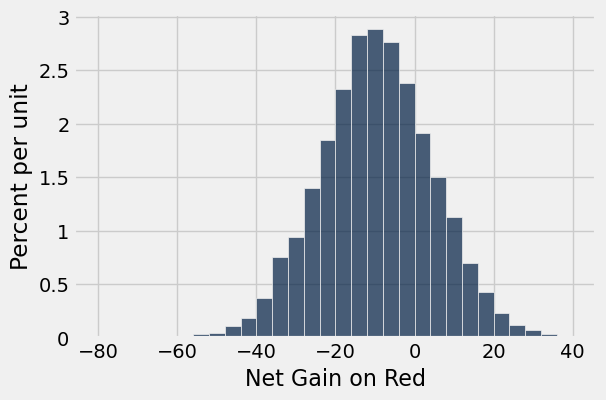

In [19]:
gains = Table().with_columns('Net Gain on Red', simulated_gains_red)
gains.hist(bins = np.arange(-80, 41, 4))

**Question 1.6:** Using the histogram above, decide whether the following statement is true or false:

>If you make 200 one-dollar bets on red, your chance of losing money is more than 50%.

Assign `loss_more_than_50` to either `True` or `False` depending on your answer to the question.


In [20]:
loss_more_than_50 = True

### Betting on a Split ###
If betting on red doesn't seem like a good idea, maybe a gambler might want to try a different bet. A bet on a *split* is a bet on two consecutive numbers such as 5 and 6. This bets pays 17 to 1. That means if you place a one-dollar bet on the split 5 and 6, then:

- If the winning pocket is either 5 or 6, your gain is 17 dollars.
- If any other pocket wins, you lose your dollar, so your gain is -1 dollars.

**Question 1.7.** Define a function `dollar_bet_on_split` that takes a pocket number and returns your gain in dollars if that pocket won and you had bet one dollar on the 5-6 split.

*Hint:* Remember that the pockets are represented as strings.


In [25]:
def dollar_bet_on_split(pocket_num):
    """ Returns gain in dollars based on the 5-6 split bet"""
    if pocket_num == '5':
        return 17
    elif pocket_num == '6':
        return 17
    else:
        return -1

Run the cell below to check that your function is doing what it should.

In [26]:
print(dollar_bet_on_split('5'))
print(dollar_bet_on_split('6'))
print(dollar_bet_on_split('00'))
print(dollar_bet_on_split('23'))

17
17
-1
-1


**Question 1.8.** Add a column `Winnings: Split` to the `wheel` table. For each pocket, the column should contain your gain in dollars if that pocket won and you had bet one dollar on the 5-6 split.


In [27]:
split_winnings = wheel.apply(dollar_bet_on_split, 'Pocket')
wheel = wheel.with_column('Winnings: Split', split_winnings)
wheel.show(5) # Do not change this line.

Pocket,Color,Winnings: Red,Winnings: Split
00,green,-1,-1
0,green,-1,-1
1,red,1,-1
2,black,-1,-1
3,red,1,-1


**Question 1.9.** Simulate the net gain in 200 one-dollar bets on the 5-6 split, repeating the process 10,000 times and saving your gains in the array `simulated_gains_split`.

*Hint:* Your code in Questions 1.4 and 1.5 may be helpful here!


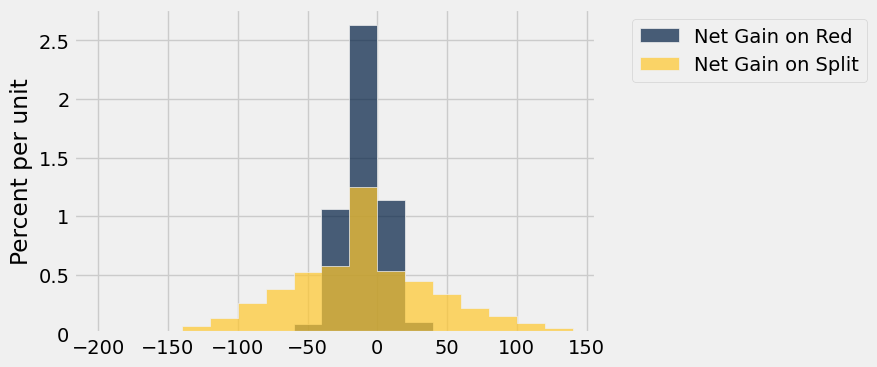

In [28]:
simulated_gains_split = make_array()

def net_gain_split(numr_bets):
    sample_bets = wheel.sample(num_bets)
    return sum(sample_bets.column("Winnings: Split"))

for i in np.arange(repetitions):
    simulated_gains_split = np.append(simulated_gains_split, net_gain_split(num_bets))

# Do not change the two lines below
gains = gains.with_columns('Net Gain on Split', simulated_gains_split)
gains.hist(bins = np.arange(-200, 150, 20))

**Question 1.10.** Look carefully at the visualization above, and assign `histogram_statements` to an array of the numbers of each statement below that can be correctly inferred from the overlaid histogram.

1. If you bet one dollar 200 times on a split, your chance of losing money is more than 50%.
2. If you bet one dollar 200 times in roulette, your chance of making more than 50 dollars is greater if you bet on a split each time than if you bet on red each time.
3. If you bet one dollar 200 times in roulette, your chance of losing more than 50 dollars is greater if you bet on a split each time than if you bet on red each time.

*Hint:* We've already seen one of these statements in a prior question.


In [29]:
histogram_statements = make_array(1, 2, 3)

If this exercise has put you off playing roulette, it has done its job. If you are still curious about other bets, [here](https://en.wikipedia.org/wiki/Roulette#Bet_odds_table) they all are, and [here](https://en.wikipedia.org/wiki/Roulette#House_edge) is the bad news. The house – that is, the casino – always has an edge over the gambler.

## 2. Chances

Before you do this exercise, make sure you understand the logic behind all the examples in [Section 9.5](https://inferentialthinking.com/chapters/09/5/Finding_Probabilities.html). 

Good ways to approach probability calculations include:

- Thinking one trial at a time: What does the first one have to be? Then what does the next one have to be?
- Breaking up the event into distinct ways in which it can happen.
- Seeing if it is easier to find the chance that the event does not happen.

### Finding Chances

On each spin of a roulette wheel, all 38 pockets are equally likely to be the winner regardless of the results of other spins. Among the 38 pockets, 18 are red, 18 black, and 2 green. In each part below, write an expression that evaluates to the chance of the event described.

**Question 2.1.** The winning pocket is black on all of the first three spins.


In [31]:
first_three_black = (18 / 38) ** 3
first_three_black

0.10628371482723427

**Question 2.2.** The color green never wins in the first 10 spins.


In [32]:
no_green = (36 / 38) ** 10
no_green

0.5823566532299392

**Question 2.3.** The color green wins **at least once** on the first 10 spins.


In [33]:
at_least_one_green = ((36 / 38) ** 9) * (2 / 38)
at_least_one_green

0.03235314740166329

**Question 2.4.** Two of the three colors **never** win in the first 10 spins.

*Hint:* What situation(s) lead to two of the three colors never winning in the first 10 spins?


In [34]:
lone_winners = ((18 / 38) ** 10 ) * 2 + (2 / 38) 
lone_winners

0.053768994285708145

### Comparing Chances
In each of Questions 2.5 - 2.7, two events A and B are described. Choose from one of the following three options and set each answer variable to a single integer:

1. Event A is more likely than Event B
2. Event B is more likely than Event A
3. The two events have the same chance.

You should be able to make the choices **without calculation**. Good ways to approach this exercise include imagining carrying out the chance experiments yourself, one trial at a time, and by thinking about the [law of averages](https://inferentialthinking.com/chapters/10/1/Empirical_Distributions.html#the-law-of-averages).

**Question 2.5.** A child picks four times at random from a box that has four toy animals: a bear, an elephant, a giraffe, and a kangaroo.

- Event A: all four different animals are picked (assuming the child picks without replacement)
- Event B: all four different animals are picked (assuming the child picks with replacement)


In [35]:
toys_option = 1

**Question 2.6.** In a lottery, two numbers are drawn at random with replacement from the integers 1 through 1000.

- Event A: The number 8 is picked on both draws
- Event B: The same number is picked on both draws


In [36]:
lottery_option = 2

**Question 2.7.** A fair coin is tossed repeatedly.

- Event A: There are 60 or more heads in 100 tosses
- Event B: There are 600 or more heads in 1000 tosses

*Hint*: Think about the law of averages!


In [37]:
coin_option = 1

## 3. Earthquakes


The next cell loads a table containing information about **every earthquake with a magnitude above 4.5** in 2023 as of September 28, 2023 (smaller earthquakes are generally not felt, only recorded by very sensitive equipment), compiled by the US Geological Survey. (source: https://earthquake.usgs.gov/earthquakes/search/)

In [38]:
earthquakes = Table().read_table('earthquakes_Fa23.csv').select(['time', 'mag', 'place'])
earthquakes

time,mag,place
2023-09-28T14:40:26.208Z,6.1,"60 km E of Luganville, Vanuatu"
2023-09-28T14:29:48.043Z,4.5,"37 km NE of Anamizu, Japan"
2023-09-28T14:00:45.712Z,4.9,nan
2023-09-28T11:16:44.404Z,4.6,Banda Sea
2023-09-28T09:05:40.098Z,4.9,"112 km SE of Sanana, Indonesia"
2023-09-28T05:53:11.904Z,4.6,"8 km E of Djibouti, Djibouti"
2023-09-28T01:43:34.284Z,5,nan
2023-09-28T01:22:05.210Z,4.7,"3 km ENE of Djibouti, Djibouti"
2023-09-28T00:14:00.235Z,4.9,nan
2023-09-27T23:43:10.324Z,4.5,south of the Fiji Islands


If we were studying all human-detectable 2023 earthquakes (as of 9/28) and had access to the above data, we would be in good shape - however, if the USGS didn’t publish the full data, we could still learn something about earthquakes from just a smaller subsample. If we gathered our sample correctly, we could use that subsample to get an idea about the distribution of magnitudes (above 4.5, of course) throughout the year!

In the following lines of code, we take two different samples from the earthquake table, and calculate the mean of the magnitudes of these earthquakes.

In [39]:
sample1 = earthquakes.sort('mag', descending = True).take(np.arange(75))
sample1_magnitude_mean = np.mean(sample1.column('mag'))
sample2 = earthquakes.take(np.arange(75))
sample2_magnitude_mean = np.mean(sample2.column('mag'))
[sample1_magnitude_mean, sample2_magnitude_mean]

[6.5373333333333346, 4.7866666666666671]

**Question 3.1.**  Are these samples representative of the population of earthquakes in the original table (that is, the should we expect the mean to be close to the population mean)? 

*Hint:* Consider the ordering of the `earthquakes` table. 

<!--
BEGIN QUESTION
name: q3_1
manual: true
-->
<!-- EXPORT TO PDF -->

*The first sample isn't representative because it's been sorted by magnitude and the first 75 were taken. This will give a disproportionate number of similar magnitudes. Sample 2 (that wasn't first sorted by mag) is more accurate because the order of magnitudes in the original table seem to be more random. Both need to be more random.*

**Question 3.2.** Write code to produce an array of magnitudes that is a sample of size 75 that is representative of the population. Then, take the mean of the magnitudes of the earthquakes in this sample. Assign these to `representative_sample` and `representative_mean` respectively. You should collect this sample *without* replacement.

In [43]:
representative_sample = earthquakes.sample(75, with_replacement= False).column('mag')
representative_mean = np.mean(representative_sample)
representative_mean

4.7866666666666671

**Question 3.3.** Suppose we want to figure out what the largest magnitude earthquake was in 2023 (as of 9/28), but we only have our representative sample of 75. Let’s see if trying to find the biggest magnitude in the population from a random sample of 75 is a reasonable idea!

Write code that takes many random samples from the `earthquakes` table and finds the maximum of each sample. You should take a random sample of size 75 and do this 10000 times. Assign the array of maximum magnitudes you find to `maximums`.

In [46]:
maximums = make_array()
for i in np.arange(10000): 
    maximums = np.append(maximums, np.max(earthquakes.sample(75, with_replacement= False).column('mag')))

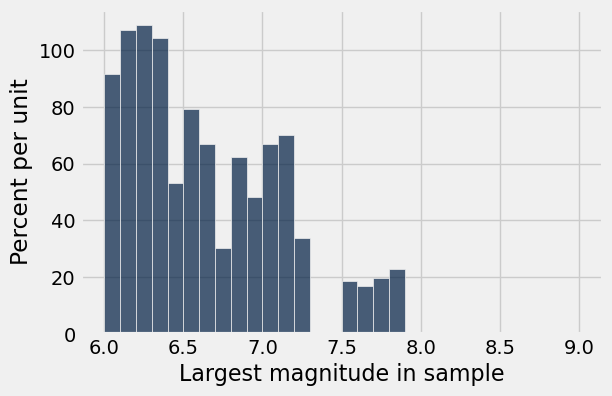

In [47]:
#Histogram of your maximums
Table().with_column('Largest magnitude in sample', maximums).hist('Largest magnitude in sample', bins = np.arange(6, 9.1, 0.1)) 

**Question 3.4.** Now find the magnitude of the actual strongest earthquake in 2023 (as of 9/28 and not the maximum of a sample). This will help us determine whether a random sample of size 75 is likely to help you determine the largest magnitude earthquake in the population.

In [48]:
strongest_earthquake_magnitude = np.max(earthquakes.column('mag'))
strongest_earthquake_magnitude

7.7999999999999998

**Question 3.5.** 
Explain whether you believe you can accurately use a sample size of 75 to determine the maximum. What is one problem with using the maximum as your estimator? Use the histogram above to help answer. 

<!--
BEGIN QUESTION
name: q3_5
manual: true
-->
<!-- EXPORT TO PDF -->

*You can get a random sample that includes the true maximum, but it's so unlikely. The true maximum is sampled at a low rate according to the histogram above. Using the maximum as your estimator will usually misrepresent the true population because it's not centrally located.*

## 4. Pass the Pig

<img src="https://upload.wikimedia.org/wikipedia/commons/b/b8/Pass_the_pigs_dice.jpg"  width='500' alt="Pass the Pigs Image">

[Pass the Pigs](https://en.wikipedia.org/wiki/Pass_the_Pigs) is a dice game using asymmetrical throwing dice (shaped like pigs). Next you will simulate the outcomes of a modified version of Pass the Pigs with the following rules. Each turn involves one player throwing one model pig, which has a dot on one side. The player gains or loses points based on the way the pig lands. Each turn lasts until the player throwing either rolls the pig in a way that wipes out their current turn score, or decides to stop their turn, add their turn score to their total score, and pass the pigs to the next player. The winner is the player with the highest total score after each player has taken 20 turns.

When throwing one pig there are six outcomes with the following (approximate) probabilities:

Position       | Probability | Description
---------------|-------------|-------------------------------------------------
Side (no dot)  | 0.349       | The pig is lying on its side without a dot
Side (dot)     | 0.302       | The pig is lying on its side with a dot
Razorback      | 0.224       | The pig is lying on its back
Trotter        | 0.088       | The pig is standing upright
Snouter        | 0.030       | The pig is leaning on its snout
Leaning Jowler | 0.007       | Jowler - The pig is resting on its snout and ear

If the player throws a `Side (no dot)` or `Side (dot)` they receive zero points and their turn in over. If the player throws a `Razorback` or `Trotter` they receive 5 points, 10 points for a `Snouter`, and 15 points for a `Leaning Jowler`. When the player throws a pig for more than 0 points, they have the choice to throw again or end their turn and add their current points to their total points. On the second throw, if the player throws a `Side (no dot)` or `Side (dot)` they receive zero points for their entire turn and their turn in over. If the player rolls a `Razorback`, `Trotter`, `Snouter` or `Leaning Jowler`, they add these points to the points in the first throw. The player then has the choice to continue throwing (as many times as possible) and risk losing their points, or end their turn and add their current points to their total points. 

**Question 4.1.** You decide to play the game conservatively and never risk losing points during your turn. Your strategy is to always take the points that you receive during your first throw of the pig and never risk losing those points with a second throw. In the cell below write a function called `Your_Turn` that simulates you taking one turn in this game. The function should take no arguments, simulate you throwing a pig with the probabilities given in the table above, and return the number of points that you receive during your turn (as a `float` or `int`).

In [62]:
def Your_Turn():
    position = make_array('Side (no dot)', 'Side (dot)', 'Razorback', 'Trotter', 'Snouter', 'Leaning Jowler')
    probability = make_array(0.349, 0.302, 0.224, 0.088, 0.030, 0.007)
    roll = np.random.choice(position, p = probability)
    
    if roll == 'Razorback':
        return 5
    elif roll == 'Trotter':
        return 5
    elif roll == 'Snouter':
        return 10
    elif roll == 'Leaning Jowler':
        return 15
    else:
        return 0
    
Your_Turn()

5

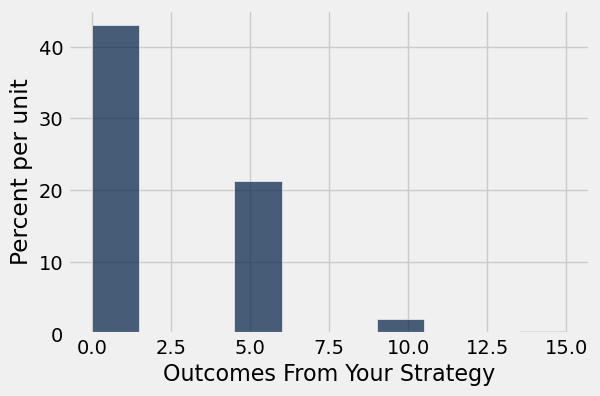

In [57]:
# Run the code below
Your_Turn_array = make_array()
for i in np.arange(5000):
    Your_Turn_array = np.append(Your_Turn_array, Your_Turn())

Table().with_column('Outcomes From Your Strategy', Your_Turn_array).hist()

**Question 4.2.** Your opponent plans a much less conservative strategy. No matter what they throw on the first throw, they will always throw again a second time. In the cell below write a function called `Opponent_Turn` that simulates your opponent taking one turn in this game. The function should take no arguments, simulate throwing a pig with the probabilities given in the table above, and return the number of points that your opponent received during their turn (as a `float` or `int`).

In [93]:
def Opponent_Turn():
    position = make_array('Side (no dot)', 'Side (dot)', 'Razorback', 'Trotter', 'Snouter', 'Leaning Jowler')
    probability = make_array(0.349, 0.302, 0.224, 0.088, 0.030, 0.007)
    roll = np.random.choice(position, p = probability)
    points = make_array()
    
    for i in np.arange(2):
        if roll == 'Razorback':
            points = np.append(points, 5)
        elif roll == 'Trotter':
            points = np.append(points, 5)
        elif roll == 'Snouter':
            points = np.append(points, 10)
        elif roll == 'Leaning Jowler':
            points = np.append(points, 15)
            
    return np.sum(points)
Opponent_Turn()

0.0

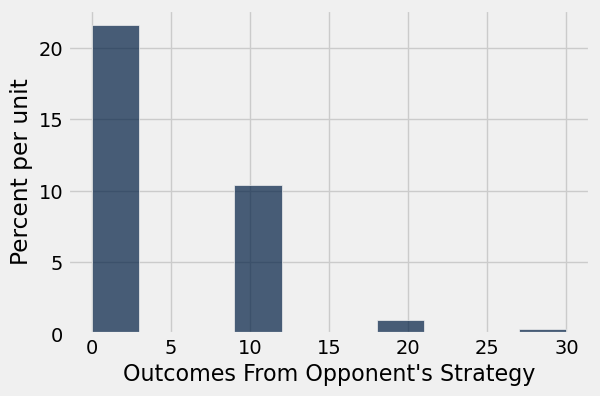

In [94]:
# Run the code below
Opponent_Turn_array = make_array()
for i in np.arange(5000):
    Opponent_Turn_array = np.append(Opponent_Turn_array, Opponent_Turn())

Table().with_column("Outcomes From Opponent's Strategy", Opponent_Turn_array).hist()

**Question 4.3.** Write a function `One_Game` that has no arguments and simulates you and your opponent playing one game of this modified version of Pass the Pigs, each taking 20 turns. This function should use the functions that you have created in the previous two questions. The function should return the difference in you and your opponent's scores at the end of the game (your final score minus your opponent's final score), as a `float` or `int`.

In [101]:
def One_Game():
    my_score = 0
    opp_score = 0
    
    for i in np.arange(20):
        my_score += Your_Turn()
        opp_score += Opponent_Turn()
        
    return my_score - opp_score


**Question 4.4.** Simulate playing this game with you and your opponent's different strategies 1000 times, keeping track of the difference in you and your opponent's scores at the end of each game (your final score minus your opponent's final score). Construct a histogram showing the distribution of these differences in scores.

In [103]:
diff_in_scores = make_array()

for i in np.arange(1000):
    diff_in_scores = np.append(diff_in_scores, One_Game())


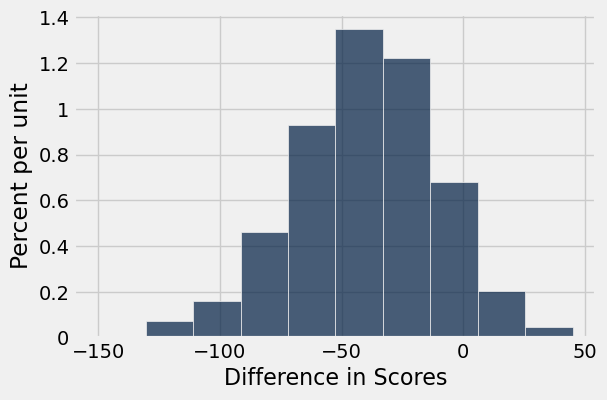

In [104]:
Diff_Scores = Table().with_column('Difference in Scores', diff_in_scores).hist()

**Question 4.5.** What proportion of the games simulated in the previous question did you win? Assign this value (as a float) to `Prop_you_won`.

In [112]:
Prop_you_Won = Table().with_column('Win?', diff_in_scores > 0).where('Win?', True).num_rows / 1000
Prop_you_Won

0.07